In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    mean_squared_error,
    r2_score
)


In [4]:
df = pd.read_csv('/Users/deepika/Documents/HBDDs/Human-Behavior-Drift-Detection-System/data/raw/movement_edges.csv')  

In [5]:
df.head()

,Event_ID,Source_Seat,Target_Seat,Path_Type,Distance,Flow_Capacity,Current_Flow,Congestion_Level
0,201,C09,C03,Ramp,9.0,247,151,0.61
1,201,C02,C42,Stairs,6.4,142,97,0.68
2,201,C18,C10,Corridor,26.8,174,120,0.69
3,201,C29,C18,Ramp,26.9,293,126,0.43
4,201,C05,C02,Ramp,18.2,233,217,0.93


In [6]:
df.shape

(1178, 8)

In [7]:
df.dtypes

Event_ID              int64
Source_Seat             str
Target_Seat             str
Path_Type               str
Distance            float64
Flow_Capacity         int64
Current_Flow          int64
Congestion_Level    float64
dtype: object

In [8]:
df.describe()

,Event_ID,Distance,Flow_Capacity,Current_Flow,Congestion_Level
count,1178.000000,1178.000000,1178.000000,1178.000000,1178.000000
mean,205.485569,17.552207,200.242784,125.375212,0.638846
std,2.868434,7.307043,59.155043,56.284100,0.220048
min,201.000000,5.000000,100.000000,50.000000,0.170000
25%,203.000000,11.200000,149.250000,80.000000,0.460000
50%,205.000000,17.500000,199.000000,113.500000,0.650000
75%,208.000000,23.700000,252.000000,160.000000,0.830000
max,210.000000,30.000000,300.000000,294.000000,1.000000


In [9]:
df.isnull().sum()

Event_ID            0
Source_Seat         0
Target_Seat         0
Path_Type           0
Distance            0
Flow_Capacity       0
Current_Flow        0
Congestion_Level    0
dtype: int64

In [10]:
df = df.drop("Event_ID", axis=1)


In [12]:
X = df.drop("Congestion_Level", axis=1)
y = df["Congestion_Level"]


In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df["Source_Seat"] = le.fit_transform(df["Source_Seat"])
df["Target_Seat"] = le.fit_transform(df["Target_Seat"])
df["Path_Type"] = le.fit_transform(df["Path_Type"])



In [19]:
df.dtypes  

Source_Seat           int64
Target_Seat           int64
Path_Type             int64
Distance            float64
Flow_Capacity         int64
Current_Flow          int64
Congestion_Level    float64
dtype: object

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


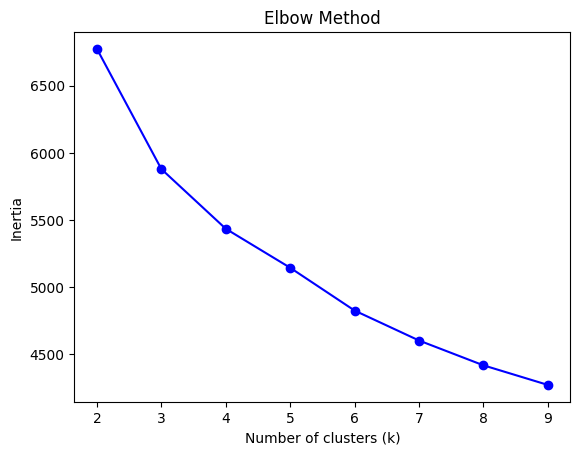

In [24]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_scaled)
    inertia.append(km.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()



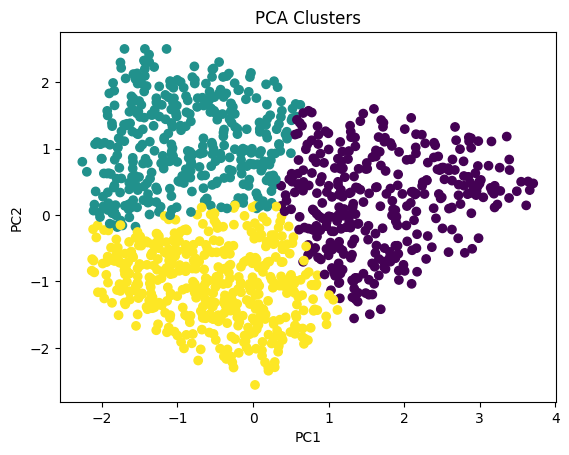

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

import matplotlib.pyplot as plt

plt.scatter(df_pca[:,0], df_pca[:,1], c=clusters)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Clusters")
plt.show()


In [25]:
from sklearn.metrics import silhouette_score

score = silhouette_score(df_scaled, clusters)
print("Silhouette Score:", score)


Silhouette Score: 0.16199282250817063
